/Users/kootsoop/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


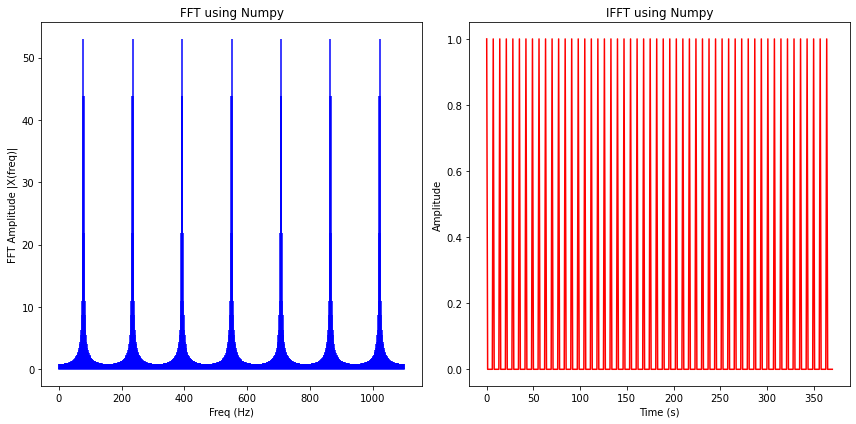

/Users/kootsoop/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


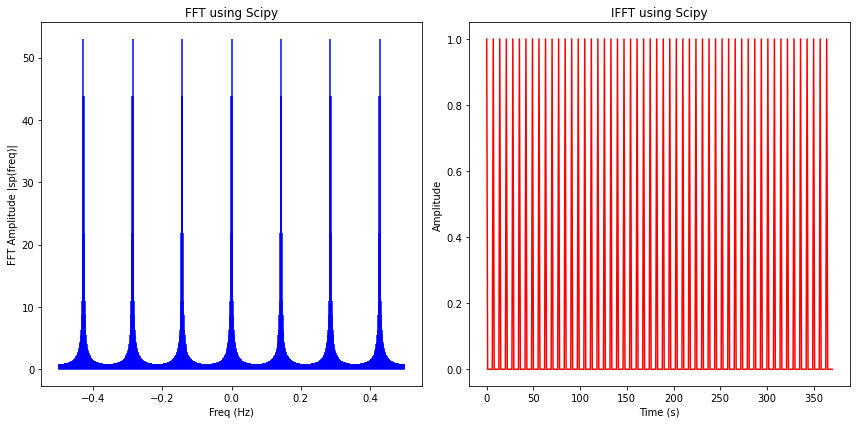

In [10]:
import numpy as np
import pandas as pd
from scipy.fft import fft, fftfreq, fftshift, ifft
from scipy.signal import blackman
from matplotlib import pyplot as plt
import random

## Signal 
num_samples = 371
# time in days
t = np.arange(int(num_samples))
t3 = np.arange(int(num_samples)*3)
# Amplitude and position of pulse. Amplitude here is 0 or 1 but can generate random values
# Position here is every 7th day
signal = [random.randint(1,1) if (i%7 == 0) else 0 for i, x in enumerate(t)]#np.sin(2*np.pi*5*t/N)#[random.randint(1,1) if (i%7 == 0) else 0 for i, x in enumerate(t)]#

# FFT and IFFT using Numpy

sr = 367
X = np.fft.fft(signal, num_samples*3)
n = np.arange(len(X))
T = num_samples/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.title('FFT using Numpy')
plt.stem(freq, fftshift(np.abs(X)), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

plt.subplot(122)
plt.title('IFFT using Numpy')
plt.plot(t, np.fft.ifft(X)[0:num_samples], 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# FFT and IFFT using Scipy

sp = fft(signal, num_samples*3)
freq = fftfreq(t.shape[-1]*3)

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.title('FFT using Scipy')
plt.stem(freq, np.abs(sp), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |sp(freq)|')

plt.subplot(122)
plt.title('IFFT using Scipy')
plt.plot(t, ifft(sp)[0:num_samples], 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [27]:
len(sp)


367